# Import Dependencies

In [2]:
import numpy as np
from PIL import Image as im
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
import itertools as it
import seaborn as sns
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#tf.debugging.set_log_device_placement(True)

# Load dataset and Summary


### Import The Dataset and it's labels

In [3]:
# the array is saved in the file images.npy 
Dataset = np.load('/content/drive/MyDrive/CNN_Task/images.npy')

In [4]:
labels=pd.read_csv('/content/drive/MyDrive/CNN_Task/Labels.csv')

### Shape of the Dataset

In [5]:
print(Dataset.shape)

(4750, 128, 128, 3)


### Labels

In [6]:
labels.shape

(4750, 1)

* We have 4750 images in the Dataset
* Each image is of size (128,128,3) 
* All the images have 3 channels(RGB)

### Convert Numpy array into images

In [7]:
array = np.reshape(Dataset, (-1, 128,128,3))

# Creating Image Object of above Array

In [19]:
i=0
for a in array:
    img = im.fromarray(a, 'RGB')
    b=labels.Label[i]
    img.save('Dataset/' +b +'/'+ str(b)+ str(i) + '.jpg' )
    i=i+1

FileNotFoundError: ignored

## Number of Classes

In [15]:
num_classes=len(pd.unique(labels['Label']))
print("Number of Classes",num_classes)

Number of Classes 12


In [20]:
label=pd.unique(labels['Label'])
for i,l in enumerate(label):
    print(i+1,":",l)

1 : Small-flowered Cranesbill
2 : Fat Hen
3 : Shepherds Purse
4 : Common wheat
5 : Common Chickweed
6 : Charlock
7 : Cleavers
8 : Scentless Mayweed
9 : Sugar beet
10 : Maize
11 : Black-grass
12 : Loose Silky-bent


* We have 12 classes in our Dataset which is listed above

## Proportion of Images in Each Class

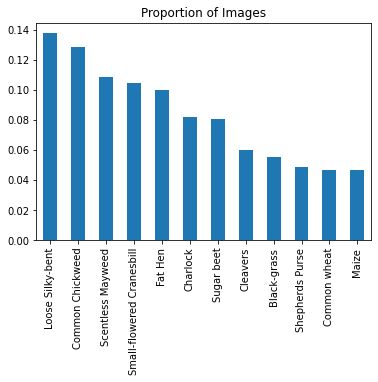

In [21]:
labels.Label.value_counts(normalize=True).plot(kind='bar',title = "Proportion of Images")

### Insight
* 13.8% Images of the Dataset is of **Loose Silky-bent** Class
* 13% Images of the Dataset is of **Common Chickweed** Class
* 11% Images of the Dataset is of **Scentless Mayweed** Class
* 10.5% Images of the Dataset is of **Small-flowered Cranesbill** Class
* 10% Images of the Dataset is of **Fat Hen** Class
* 8.2% Images of the Dataset is of **Charlock** Class 
* 8.1% Images of the Dataset is of **Sugar beet** Class
* 6% Images of the Dataset is of **Cleavers** Class
* 5.5% Images of the Dataset is of **Black-grass** Class
* 5% Images of the Dataset is of **Shepherds Purse** Class
* 4.9% Images of the Dataset is of **Common Wheat** Class
* 4.9% Images of the Dataset is of **Maze** Class 

## Plot the Images

Text(0.5, 1.0, 'Loose Silky-bent')

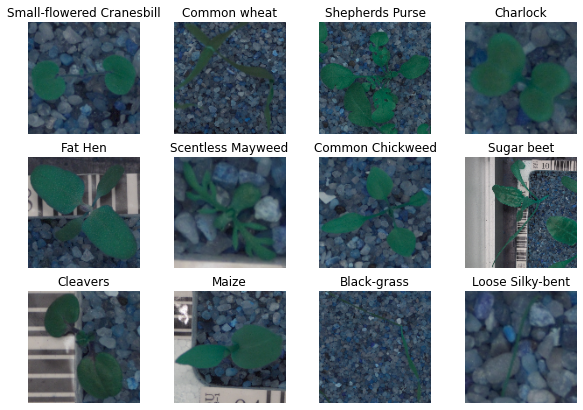

In [22]:
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 3
columns = 4
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Dataset[0])
plt.axis('off')
plt.title(labels["Label"][0])
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Dataset[1408])
plt.axis('off')
plt.title(labels["Label"][1408])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Dataset[1000])
plt.axis('off')
plt.title(labels["Label"][1000])
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Dataset[2300])
plt.axis('off')
plt.title(labels["Label"][2300])

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Dataset[500])
plt.axis('off')
plt.title(labels["Label"][500])
  
# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Dataset[3000])
plt.axis('off')
plt.title(labels["Label"][3000])
  
# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Dataset[1800])
plt.axis('off')
plt.title(labels["Label"][1800])
  
# Adds a subplot at the 8th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(Dataset[3400])
plt.axis('off')
plt.title(labels["Label"][3400])

# Adds a subplot at the 9th position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(Dataset[2500])
plt.axis('off')
plt.title(labels["Label"][2500])
  
# Adds a subplot at the 10th position
fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(Dataset[3810])
plt.axis('off')
plt.title(labels["Label"][3810])
  
# Adds a subplot at the 11th position
fig.add_subplot(rows, columns, 11)
  
# showing image
plt.imshow(Dataset[4000])
plt.axis('off')
plt.title(labels["Label"][4000])
  
# Adds a subplot at the 12th position
fig.add_subplot(rows, columns, 12)
  
# showing image
plt.imshow(Dataset[4400])
plt.axis('off')
plt.title(labels["Label"][4400])

# Perform an Exploratory Data Analysis on the images

In [ ]:
# get the list of jpegs from sub image class folders
Black_grass = [fn for fn in os.listdir(f'Dataset/Black-grass') if fn.endswith('.jpg')]
Small_flowered_Cranesbill = [fn for fn in os.listdir(f'Dataset/Small-flowered Cranesbill') if fn.endswith('.jpg')]
Fat_Hen = [fn for fn in os.listdir(f'Dataset/Fat Hen') if fn.endswith('.jpg')]
Shepherds_Purse = [fn for fn in os.listdir(f'Dataset/Shepherds Purse') if fn.endswith('.jpg')]
Common_wheat = [fn for fn in os.listdir(f'Dataset/Common wheat') if fn.endswith('.jpg')]
Common_Chickweed = [fn for fn in os.listdir(f'Dataset/Common Chickweed') if fn.endswith('.jpg')]
Charlock = [fn for fn in os.listdir(f'Dataset/Charlock') if fn.endswith('.jpg')]
Cleavers = [fn for fn in os.listdir(f'Dataset/Cleavers') if fn.endswith('.jpg')]
Scentless_Mayweed = [fn for fn in os.listdir(f'Dataset/Scentless Mayweed') if fn.endswith('.jpg')]
Sugar_beet = [fn for fn in os.listdir(f'Dataset/Sugar beet') if fn.endswith('.jpg')]
Maize = [fn for fn in os.listdir(f'Dataset/Maize') if fn.endswith('.jpg')]
Loose_Silky_bent = [fn for fn in os.listdir(f'Dataset/Loose Silky-bent') if fn.endswith('.jpg')]

### Number of Images in Eack Class

In [ ]:
print("Number of Images in Black_grass Class:{}".format(len(Black_grass)))

In [ ]:
print("Number of Images in Small_flowered_Cranesbill Class:{}".format(len(Small_flowered_Cranesbill)))

In [ ]:
print("Number of Images in Fat_Hen Class:{}".format(len(Fat_Hen)))

In [ ]:
print("Number of Images in Shepherds_Purse Class:{}".format(len(Shepherds_Purse)))

In [ ]:
print("Number of Images in Common_wheat Class:{}".format(len(Common_wheat)))

In [ ]:
print("Number of Images in Common_Chickweed Class:{}".format(len(Common_Chickweed)))

In [ ]:
print("Number of Images in Charlock Class:{}".format(len(Charlock)))

In [ ]:
print("Number of Images in Cleavers Class:{}".format(len(Cleavers)))

In [ ]:
print("Number of Images in Loose_Silky_bent Class:{}".format(len(Loose_Silky_bent)))

In [ ]:
print("Number of Images in Maize Class:{}".format(len(Maize)))

In [ ]:
print("Number of Images in Sugar_beet Class:{}".format(len(Sugar_beet)))

In [ ]:
print("Number of Images in Scentless_Mayweed Class:{}".format(len(Scentless_Mayweed)))

## Plot the Images of Each Class

<function matplotlib.pyplot.show(*args, **kw)>

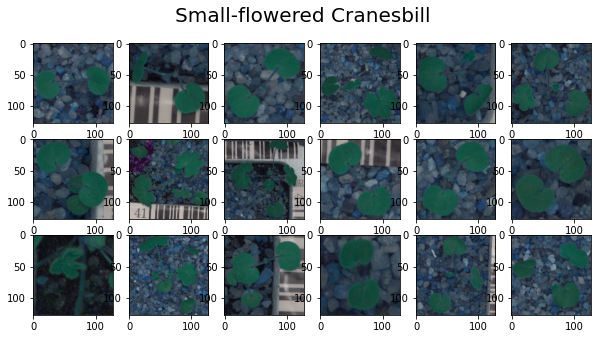

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=0
fig.suptitle('Small-flowered Cranesbill', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(np.squeeze(image))
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

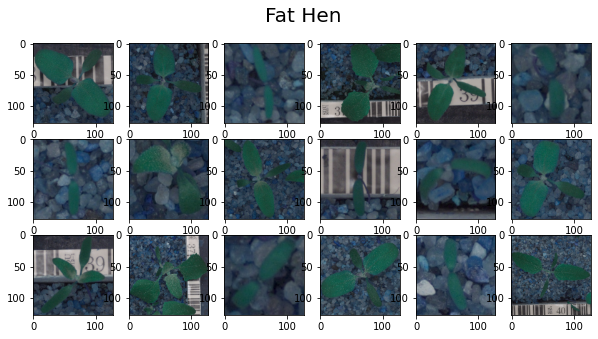

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=500
fig.suptitle('Fat Hen', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

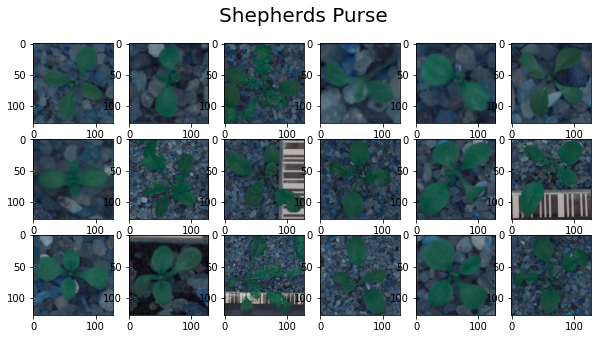

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=995
fig.suptitle('Shepherds Purse', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

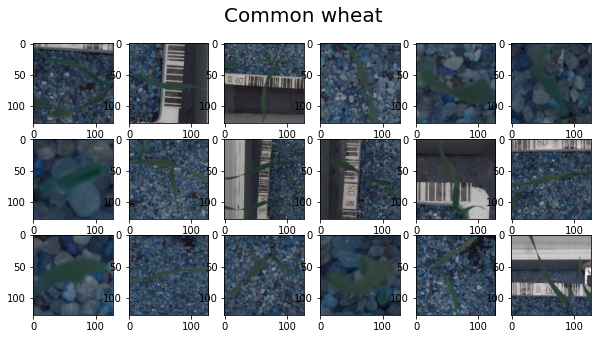

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=1204
fig.suptitle('Common wheat', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

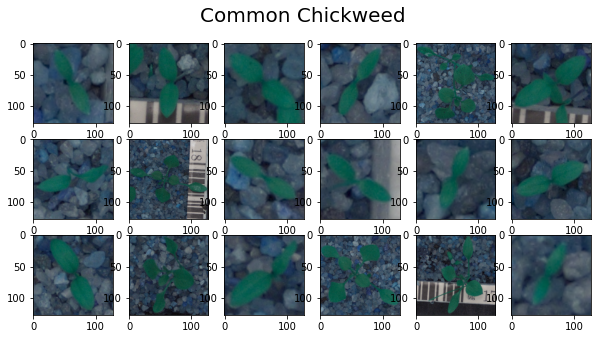

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=1425
fig.suptitle('Common Chickweed', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

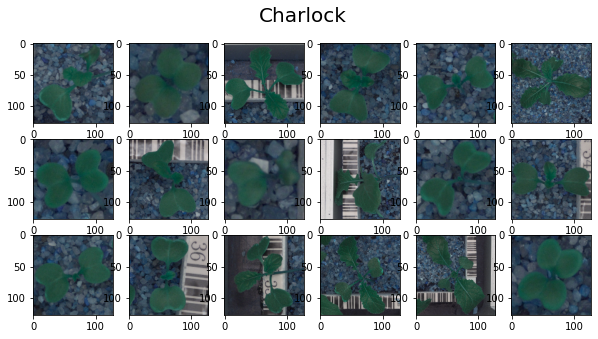

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=2058
fig.suptitle('Charlock', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

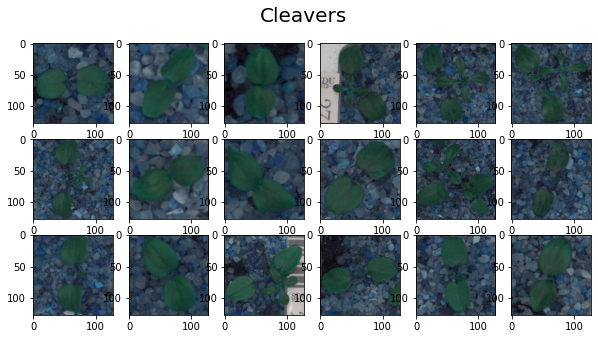

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=2426
fig.suptitle('Cleavers', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

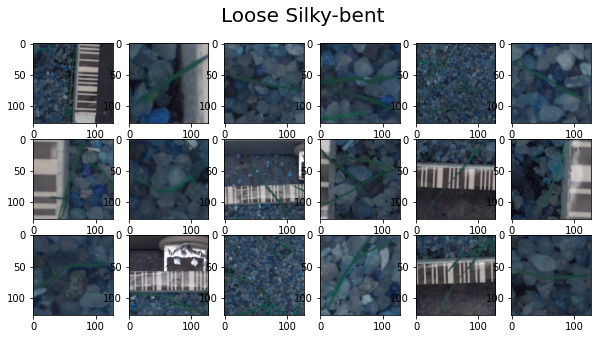

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=4098
fig.suptitle('Loose Silky-bent', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

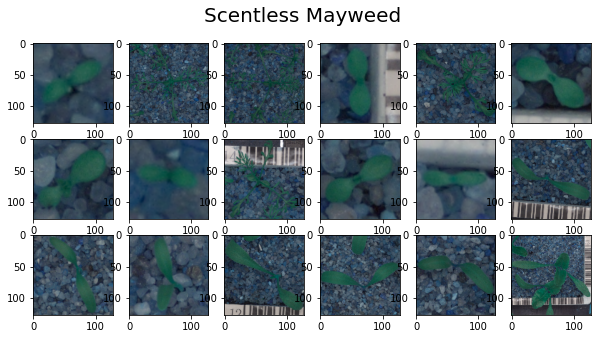

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=3118
fig.suptitle('Scentless Mayweed', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

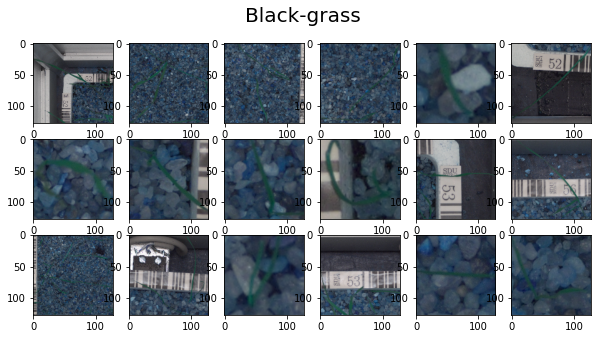

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=4032
fig.suptitle('Black-grass', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

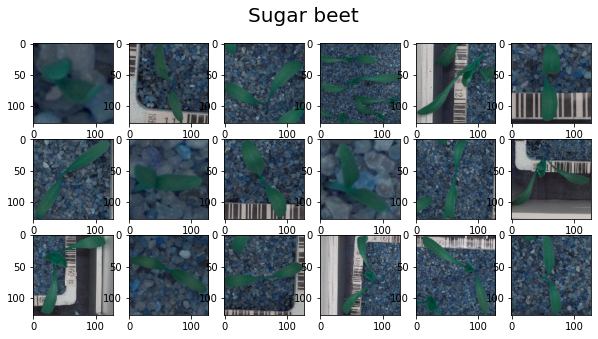

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=3399
fig.suptitle('Sugar beet', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

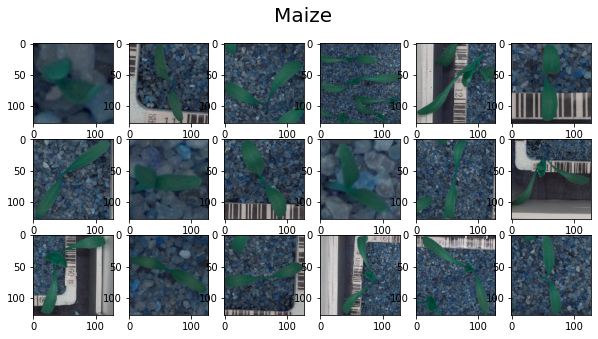

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=3399
fig.suptitle('Maize', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+10
plt.show

# Key meaningful observations from EDA
* Total number of iamges in the Dataset is **4750**
* Total number of classes of Plant is 12 which is listed below
     1. Small-flowered Cranesbill
     2. Fat Hen
     3. Shepherds Purse
     4. Common wheat
     5. Common Chickweed
     6. Charlock
     7. Cleavers
     8. Scentless Mayweed
     9. Sugar beet
     10. Maize
     11. Black-grass
     12. Loose Silky-bent
* Size of all images in the Dataset is **(128,128,3)**
* 13.8% Images(645 images) of the Dataset is of **Loose Silky-bent** Class
* 13% Images (611) of the Dataset is of **Common Chickweed** Class
* 11% Images(516) of the Dataset is of **Scentless Mayweed** Class
* 10.5% Images(496) of the Dataset is of **Small-flowered Cranesbill** Class
* 10% Images(475) of the Dataset is of **Fat Hen** Class
* 8.2% Images(390) of the Dataset is of **Charlock** Class 
* 8.1% Images(385) of the Dataset is of **Sugar beet** Class
* 6% Images(287) of the Dataset is of **Cleavers** Class
* 5.5% Images(263) of the Dataset is of **Black-grass** Class
* 5% Images(231) of the Dataset is of **Shepherds Purse** Class
* 4.9% Images(221) of the Dataset is of **Common Wheat** Class
* 4.9% Images(221) of the Dataset is of **Maze** Class 

* All the images has labels in **csv** file

# Data Pre-Processing

## Remove unwanted noise from the images using Guassian Blurring
The Gaussian blur feature is obtained by blurring (smoothing) an image using a Gaussian function to reduce the noise level.
It can be considered as a nonuniform low-pass filter that preserves low spatial frequency and reduces image noise and negligible details in an image. It is typically achieved by convolving an image with a Gaussian kernel. This Gaussian kernel in 2-D form is expressed as

In [35]:
Blurred=[]

In [36]:
kernelSizes = (3, 3)
# loop over the kernel sizes and apply a "Gaussian" blur to the image
for Image in Dataset:
    Blurred.append(cv2.GaussianBlur(Image, kernelSizes, 0))

## Apply the Normalization 
Image Normalization is a process in which we change the range of pixel intensity values to make the image more familiar or normal to the senses, hence the term normalization. Often image normalization is used to increase contrast which aids in improved feature extraction or image segmentation.


Image Normalization is used to remove noise from the picture (data). With the help of Image Normalization, we can remove high-frequency noise and very low noise from the image which is really helpful. When we look at an image that is unclear to our senses, it becomes stressful for our eyes. But with the help of Image Normalization, we bring the image into a range of intensity values which is normal to our senses and hence we do not have to stress our visual senses and can clearly understand what is going on in an image. Whenever an image gets a poor contrast due to any reason our aim is to fix the contrast of the image so that it is normal to our senses.

In a normalized image:

* Mean = 0
* Variance = 1

In [37]:
Pre_Process_Dataset=[]
norm_img=np.zeros((128,128))
for Image in Blurred:
    Pre_Process_Dataset.append(cv2.normalize(Image,  norm_img, 0, 255, cv2.NORM_MINMAX))

## Plot the images before and after the pre-processing steps ( Blurring & Normalization ) 

### Images before Pre-processing steps ( Blurring & Normalization )

<function matplotlib.pyplot.show(*args, **kw)>

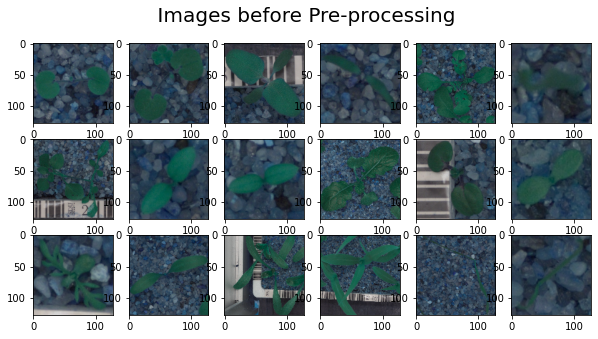

In [38]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=0
fig.suptitle(' Images before Pre-processing', fontsize=20)
for i in range(18):
    image = Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+250
plt.show

### Images after Pre-processing steps ( Blurring & Normalization )

<function matplotlib.pyplot.show(*args, **kw)>

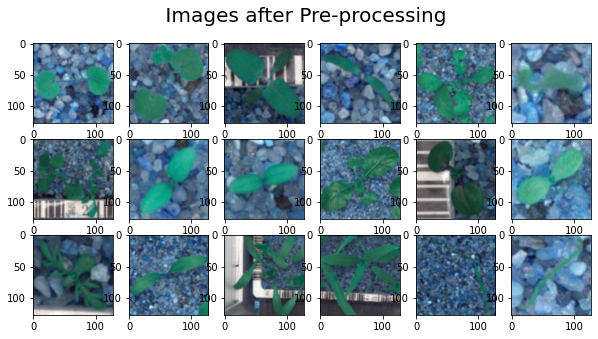

In [39]:
fig, ax = plt.subplots(nrows=3, ncols=6,figsize=(10,5))
a=0
fig.suptitle(' Images after Pre-processing', fontsize=20)
for i in range(18):
    image = Pre_Process_Dataset[a]
    ax.flatten()[i].imshow(image)
    a=a+250
plt.show

After **Pre-Procesing** the change is quite evident. When you compare it with the Images before pre-processing, you can notice that it is far clearer and has better contrast.

# One Hot-Encoding

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')
# transform data
Y = enc.fit_transform(labels[['Label']]).toarray()

In [41]:
#plt.imshow(X_test[1)
lists=[0,500,1000,1408,2300,3000,1800,3400,2500,3810,4000,4400]
for i in lists:
    print(Y[i],":",labels['Label'][i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] : Small-flowered Cranesbill
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] : Fat Hen
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] : Shepherds Purse
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] : Common wheat
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] : Charlock
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] : Scentless Mayweed
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] : Common Chickweed
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] : Sugar beet
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] : Cleavers
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] : Maize
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] : Black-grass
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] : Loose Silky-bent


## Split the data into train and test

In [42]:
#Y=labels["Label"]
X=np.asarray(Pre_Process_Dataset)

## Split the Data into 75% train data and 25% Validation Data 

In [44]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size=0.25, random_state=42)

In [45]:
print("X_train shape {}, Y_train shape {},X_Valid shape {}, Y_valid {}.".format(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape))

X_train shape (3562, 128, 128, 3), Y_train shape (3562, 12),X_Valid shape (1188, 128, 128, 3), Y_valid (1188, 12).


# Model building
## Build Convolution Neural Network

In [46]:
model = Sequential()
model.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 100)     2800      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 100)    400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 75)        67575     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 75)       0         
 2D)                                                             
                                                        

In [48]:
# Important to use Categorical crossentropy as we now have a Categorical classification problem
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [49]:
history=model.fit(X_train, Y_train, epochs=100, verbose=1,batch_size=10 ,validation_data=(X_valid, Y_valid))

Epoch 1/100
357/357 [==============================] - 16s 20ms/step - loss: 1.4887 - accuracy: 0.5034 - val_loss: 1.6553 - val_accuracy: 0.5025
Epoch 2/100
357/357 [==============================] - 6s 17ms/step - loss: 0.8742 - accuracy: 0.6979 - val_loss: 1.4965 - val_accuracy: 0.5564
Epoch 3/100
357/357 [==============================] - 6s 17ms/step - loss: 0.6398 - accuracy: 0.7813 - val_loss: 0.9578 - val_accuracy: 0.6978
Epoch 4/100
357/357 [==============================] - 6s 17ms/step - loss: 0.4517 - accuracy: 0.8383 - val_loss: 0.8515 - val_accuracy: 0.7315
Epoch 5/100
357/357 [==============================] - 6s 18ms/step - loss: 0.3422 - accuracy: 0.8810 - val_loss: 0.8690 - val_accuracy: 0.7449
Epoch 6/100
357/357 [==============================] - 6s 17ms/step - loss: 0.2189 - accuracy: 0.9242 - val_loss: 0.9143 - val_accuracy: 0.7062
Epoch 7/100
357/357 [==============================] - 6s 18ms/step - loss: 0.2126 - accuracy: 0.9259 - val_loss: 1.8144 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


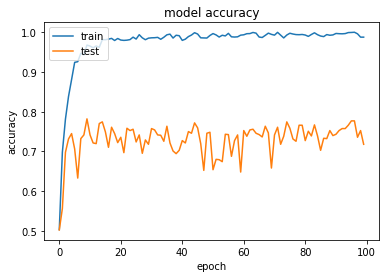

In [50]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

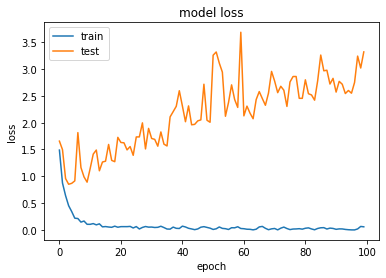

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Performance of Model 
* Model Perform very well on Train Data but for the vaildation data the performace of CNN model is not that promising.
* It means the model went to overfitting 
* So, we will add kernel_regularizer and Dropout layer in our model in order to avoid overfitting 
* **kernel_regularizer**: Regularizer to apply a penalty on the layer's kernel

# Confusion Matrix
Most threshold metrics can be best understood by the terms used in a confusion matrix for a binary (two-class) classification problem. This does not mean that the metrics are limited for use on binary classification; it is just an easy way to quickly understand what is being measured.

The confusion matrix provides more insight into not only the performance of a predictive model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.

In [52]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.rcParams["figure.figsize"] = (80,20)
    # update the overall font size
    plt.rcParams.update({'font.size':30})
    plt.labelsize=200
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float'/cm.sum(axis=1))[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh=cm.max()/2
    for i,j in it.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [53]:
y_pred=model.predict(X_valid)

38/38 [==============================] - 1s 14ms/step


In [54]:
Y_pr=np.argmax(y_pred,axis=1)

In [55]:
Y_vl=np.argmax(Y_valid,axis=1)

Confusion matrix, without normalization
[[ 22   0   0   2   1   8  23   2   3   0   0   0]
 [  1  87   2   0   0   1   0   0   1   2   4   1]
 [  0   1  69   1   0   2   1   2   0   0   2   0]
 [  0   0   2 110   0  10   1   2   3   6   5   0]
 [  5   1   4   1  24   5   4   4   1   0   0   0]
 [  3   1   4   5   2  99   4   0   0   0   2   0]
 [ 38   0   1   0   9  20 101   1   0   0   2   0]
 [  0   2   1   1   1   1   0  39   3   0   1   3]
 [  1   6   9   7   0   5   2   4  84   5   3   2]
 [  0   6   1   4   0   6   0   1   8  36   4   0]
 [  1   0   3   2   0   1   0   3   0   1 126   0]
 [  3   1   6   2   0   5   0   4   6   2   2  56]]


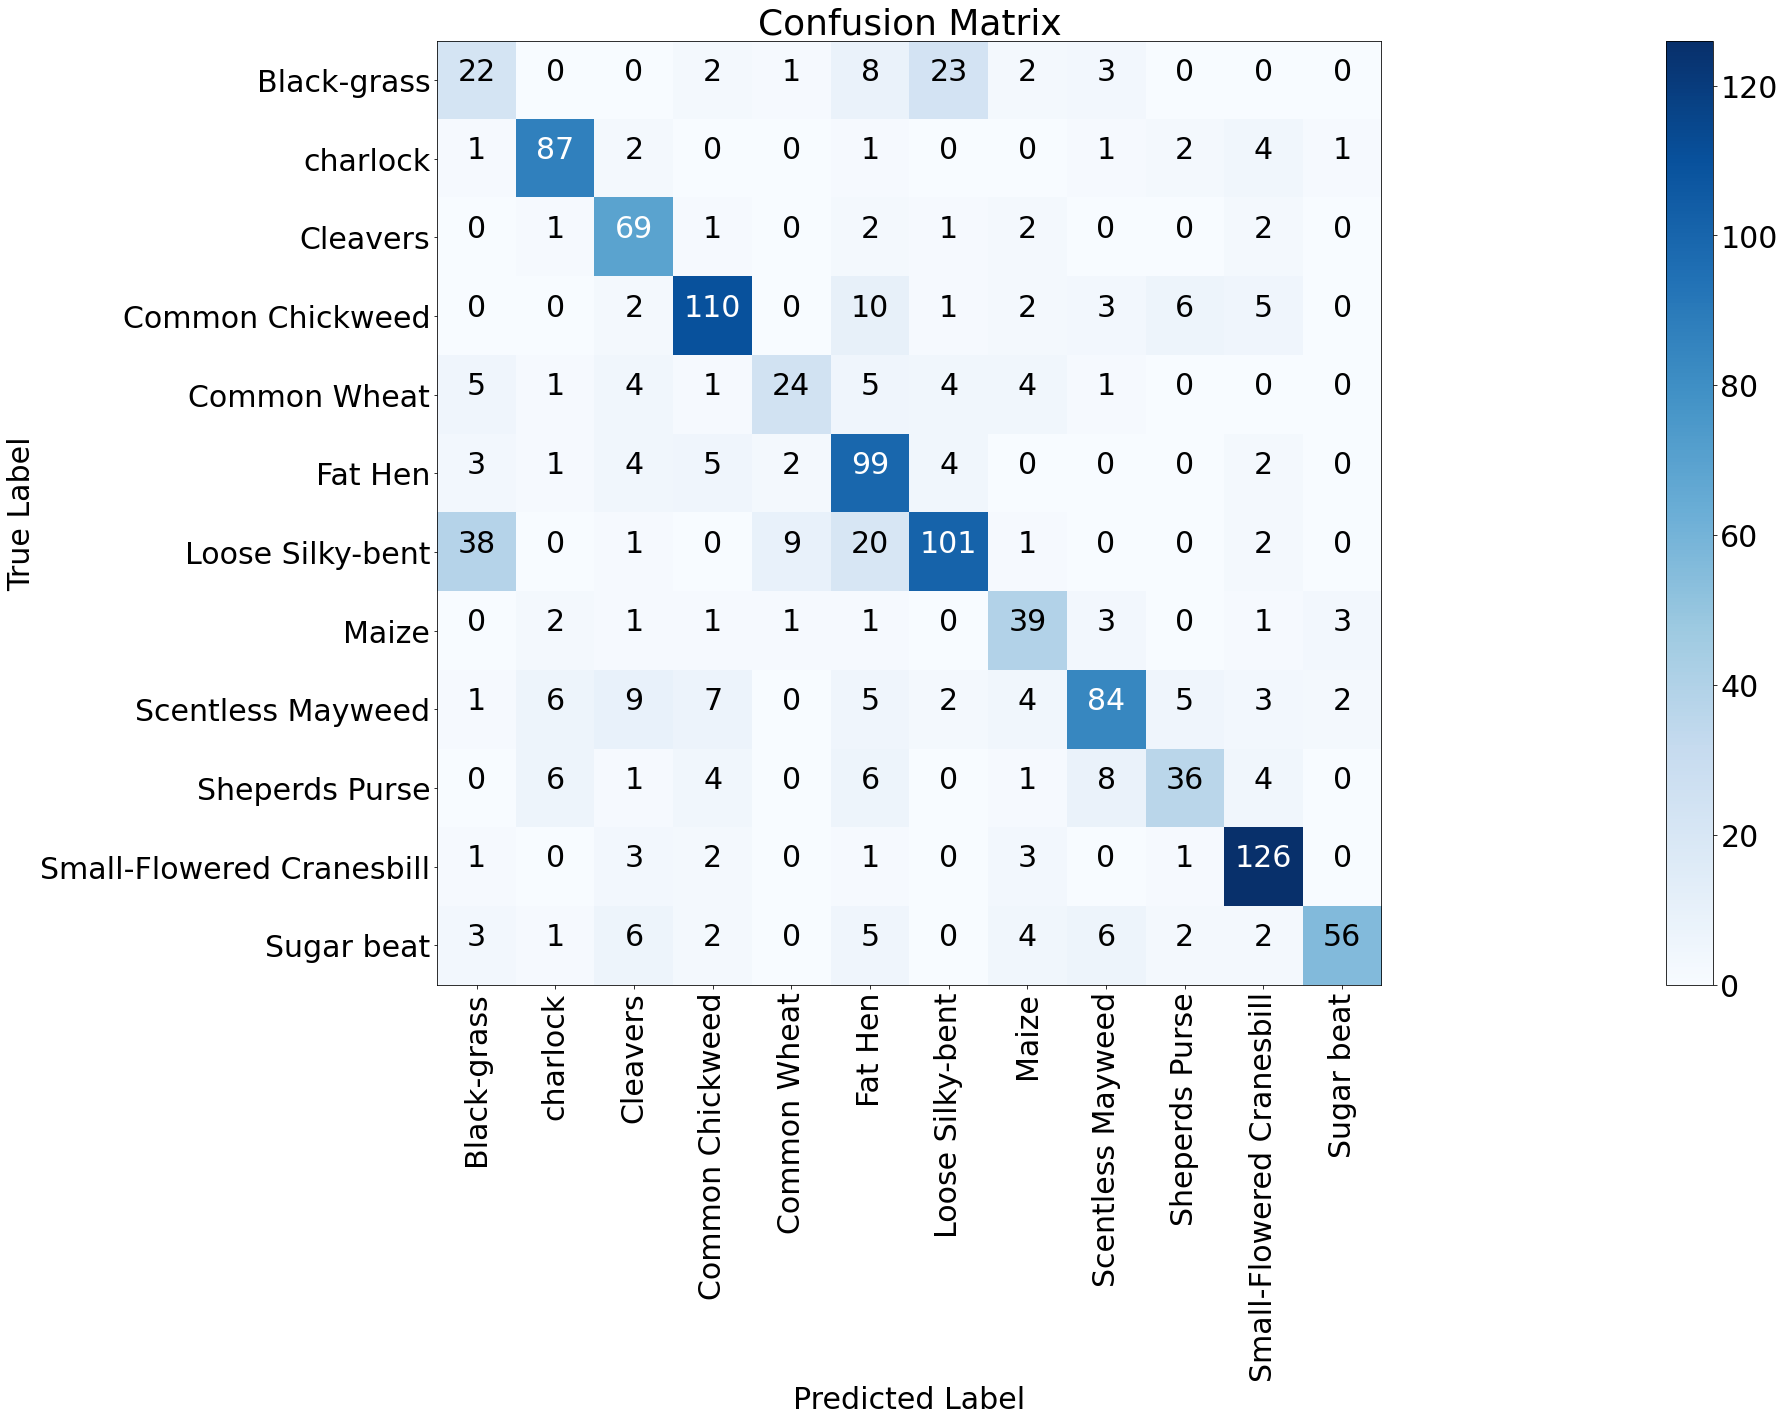

In [56]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Black-grass','charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent',
               'Maize','Scentless Mayweed','Sheperds Purse','Small-Flowered Cranesbill','Sugar beat']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

* The model perform very well for all the classes
* For **Black-grass** out of 64 times the model only predicted 25 times correctly which is not that good.
* For remaining Classes the model predict almost 70% correctly

# Classification_report
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score

**Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.

**Precision = TruePositive / (TruePositive + FalsePositive)**

**Recall** summarizes how well the positive class was predicted and is the same calculation as sensitivity.

**Recall = TruePositive / (TruePositive + FalseNegative)**

Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.

**F-Measure = (2 * Precision * Recall) / (Precision + Recall)**

In [57]:
print(classification_report(Y_vl,Y_pr))

              precision    recall  f1-score   support

           0       0.30      0.36      0.33        61
           1       0.83      0.88      0.85        99
           2       0.68      0.88      0.77        78
           3       0.81      0.79      0.80       139
           4       0.65      0.49      0.56        49
           5       0.61      0.82      0.70       120
           6       0.74      0.59      0.66       172
           7       0.63      0.75      0.68        52
           8       0.77      0.66      0.71       128
           9       0.69      0.55      0.61        66
          10       0.83      0.92      0.88       137
          11       0.90      0.64      0.75        87

    accuracy                           0.72      1188
   macro avg       0.70      0.69      0.69      1188
weighted avg       0.73      0.72      0.72      1188



By Analysing of the **Classification report**
*  The precision of of Class 0(Black-Grass) is not good at all 
* For remainig classes the both precision and recall have very good values

### New_Model

In [58]:
model_n = Sequential()
model_n.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(128, 128, 3)))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",kernel_regularizer='l1'))
model_n.add(Dropout(0.2))
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu",kernel_regularizer='l1'))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu",kernel_regularizer='l1'))
model_n.add(Dropout(0.2))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model_n.add(Flatten())
model_n.add(Dense(units=512, activation="relu"))
model_n.add(Dense(units=num_classes, activation="softmax"))

In [59]:
# Important to use Categorical crossentropy as we now have a categorical classification problem
model_n.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [60]:
history_n=model_n.fit(X_train, Y_train, epochs=100, verbose=1,batch_size=10 ,validation_data=(X_valid, Y_valid))

Epoch 1/100
357/357 [==============================] - 8s 19ms/step - loss: 11.0293 - accuracy: 0.4189 - val_loss: 3.5602 - val_accuracy: 0.2214
Epoch 2/100
357/357 [==============================] - 7s 19ms/step - loss: 1.9769 - accuracy: 0.5912 - val_loss: 3.6149 - val_accuracy: 0.2795
Epoch 3/100
357/357 [==============================] - 7s 19ms/step - loss: 1.5152 - accuracy: 0.6634 - val_loss: 1.5975 - val_accuracy: 0.6734
Epoch 4/100
357/357 [==============================] - 7s 19ms/step - loss: 1.2813 - accuracy: 0.7325 - val_loss: 2.1112 - val_accuracy: 0.5253
Epoch 5/100
357/357 [==============================] - 7s 19ms/step - loss: 1.1763 - accuracy: 0.7810 - val_loss: 3.2470 - val_accuracy: 0.3232
Epoch 6/100
357/357 [==============================] - 7s 19ms/step - loss: 0.9639 - accuracy: 0.8212 - val_loss: 1.7005 - val_accuracy: 0.5901
Epoch 7/100
357/357 [==============================] - 7s 18ms/step - loss: 0.7528 - accuracy: 0.8613 - val_loss: 1.6534 - val_accuracy

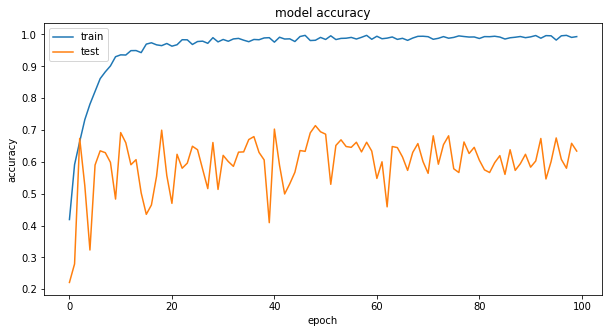

In [61]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
plt.plot(history_n.history['accuracy'])
plt.plot(history_n.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

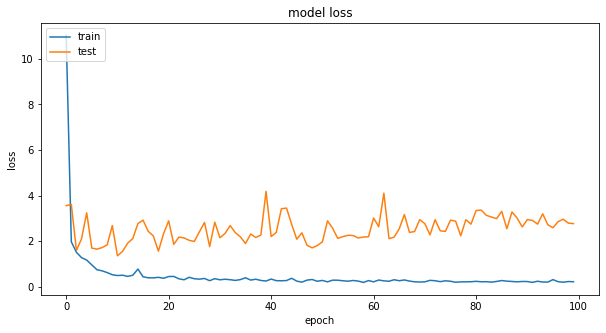

In [62]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Performance 

In [ ]:
y_pred_n=model_n.predict(X_valid)
Y_pr_n=np.argmax(y_pred_n,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

In [ ]:
cm=confusion_matrix(Y_vl,Y_pr_n)
cm_plot_label=['Black-grass','charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent',
               'Maize','Scentless Mayweed','Sheperds Purse','Small-Flowered Cranesbill','Sugar beat']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

* The model perform very well for all the classes
* For **Black-grass** out of 64 times the model only predicted 10 times correctly which is worse than the previous model performance.
* Similarly for other classes the performce of model is gotten worse
* This model performance is not as promising as previous model
* So, we will use the previous model

# Classification_report

In [ ]:
print(classification_report(Y_vl,Y_pr_n))

By Analysing of the **Classification report**
*  The precision of of Class 0(Black-Grass) is not good at all 
* For remainig classes the both precision and recall have a appropriate values
* But it is not good as compared to the previous model

* The model is still an **Overfit**
* We will use Data augmentation in order to get more dara for training and validation

## Data Augmentation
Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=30, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15, # Randomly zoom image 
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,   # randomly shift images vertically (fraction of total height)
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    samplewise_center=True) # set each sample mean to 0)

In [ ]:
train_ds=aug.flow(X_train,Y_train)
valid_ds=aug.flow(X_valid,Y_valid)

# 3rd Model

In [ ]:
model_n = Sequential()
model_n.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(128, 128, 3)))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model_n.add(BatchNormalization())
model_n.add(MaxPool2D((2, 2), strides=2, padding="same"))
model_n.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model_n.add(Flatten())
model_n.add(Dense(units=512, activation="relu"))
model_n.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
model_n.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
history_n=model_n.fit(train_ds, epochs=100, verbose=1,batch_size=10 ,validation_data=(valid_ds))

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
plt.plot(history_n.history['accuracy'])
plt.plot(history_n.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion Matrix

In [ ]:
y_pred_n=model_n.predict(X_valid)

In [ ]:
y_pr_n=np.argmax(y_pred_n,axis=1)

In [ ]:
cm=confusion_matrix(Y_vl,y_pr_n)

In [ ]:
cm_plot_label=['Black-grass','charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent',
               'Maize','Scentless Mayweed','Sheperds Purse','Small-Flowered Cranesbill','Sugar beat']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

## Model Performace

* Although the model perform very well on Data that has generated using **Data Augmentation** but it perform very poor in predicting on test Dataset(means **overfitting**). 
* So, we will stick to the fist model as it perform well from both of the above cases.

# Final Model

In [ ]:
model = Sequential()
model.add(Conv2D(100, (3, 3), strides=1, padding="same", activation="relu", 
          input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
# Important to use Categorical crossentropy as we now have a Categorical classification problem
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
history=model.fit(X_train, Y_train, epochs=100, verbose=1,batch_size=10 ,validation_data=(X_valid, Y_valid))

## Final Model Performance

In [ ]:
y_pred=model.predict(X_valid)

In [ ]:
print(history.history.keys())
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':10})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion Matrix

In [ ]:
y_pred=model.predict(X_valid)
Y_pr=np.argmax(y_pred,axis=1)
Y_vl=np.argmax(Y_valid,axis=1)

In [ ]:
cm=confusion_matrix(Y_vl,Y_pr)
cm_plot_label=['Black-grass','charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent',
               'Maize','Scentless Mayweed','Sheperds Purse','Small-Flowered Cranesbill','Sugar beat']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

## Classification Report

In [ ]:
print(classification_report(Y_vl,Y_pr))

In [ ]:
model.evaluate(X_valid,Y_valid)

Accucarcy of Model on Validation Dataset is **73.65%** which is good enough for this Dataset as there were very limited number of images in some classes.

From the **Confusion metrics** and **Classification Report** we can see that the model perform very well on Classifing the classes with High precision and recall. 
* For all the Classes the precision and Recall value is almost above than 70% which is good enough.

**Scope of Improvement:** 
* The model performance can be improve by getting more data for training so that the model can explore more data during train and make it more robust while predicting an unseen data.
* We can also use Hyperparameter to improve model performance but it will be very computational expensive.  

# Conclusion and Key Takeaways
* There were 12 classes of plants in the Dataset.
* Total images in the Dataset is 4750.
* We used Data Augmenatation in order to increase the Data.
* But the model performance didn't improve 
* The model can perform even more better if we have more Data.
* As some of the classes has very few images and we know that Convolution Neural Network Huge Data as compared to traditional Machine learning
* Transfer learning and Fine Tuning technique can also be use for improving the model performance. 

# 